In [36]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

## Visualizing entire dataset

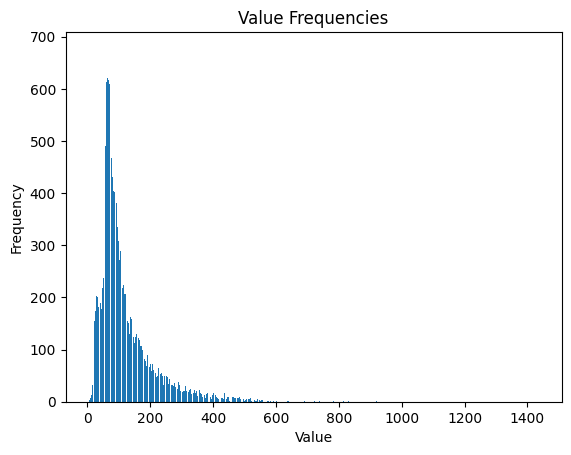

In [13]:
df = pd.read_csv('cleaned_dataset.csv')
df['lengths'] = df['review'].apply(lambda x: len(x.split()))

value_counts = df['lengths'].value_counts().sort_index()


plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Value Frequencies')
plt.show()


In [19]:
print(f"mean of the dataset is {df['lengths'].mean()}")
print(f"median of the dataset is {df['lengths'].median()}")

mean of the dataset is 120.90528
median of the dataset is 90.0


In [18]:
print(f"using 200 max-length encorporates {percentileofscore(df['lengths'], 200)}% of data with 0 loss")
print(f"using 200 max-length encorporates {percentileofscore(df['lengths'], 250)}% of data with less than 1/5th loss")
print(f"using 200 max-length encorporates {percentileofscore(df['lengths'], 300)}% of data with less than 1/3rd loss")
print(f"using 200 max-length encorporates {percentileofscore(df['lengths'], 400)}% of data with less than 1/2 loss")

using 200 max-length encorporates 85.682% of data with 0 loss
using 200 max-length encorporates 91.046% of data with less than 1/5th loss
using 200 max-length encorporates 94.444% of data with less than 1/3rd loss
using 200 max-length encorporates 97.775% of data with less than 1/2 loss


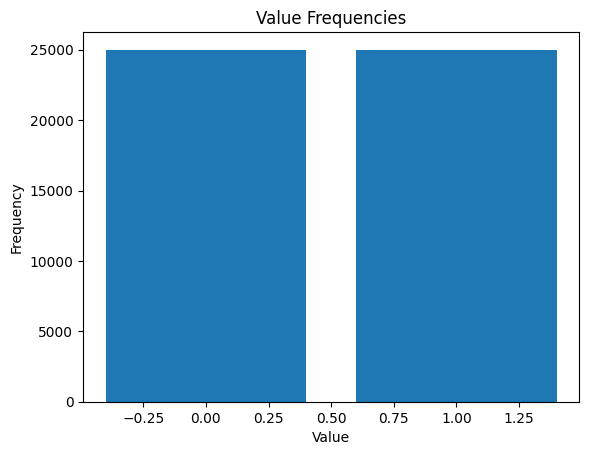

In [6]:
value_counts = df['sentiment'].value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Value Frequencies')
plt.show()

In [21]:
print('''Conclusions:
    The dataset is balanced, so we don't need to worry about class imbalance.
    The mean and median of the dataset are 120 and 90 respectively.
    Using 200 max-length encorporates 85.6 percentile of data with 0 loss, 91 percentilw of dataset with less than 1/5th data loss, So we can use 200 as max-length.     
      ''')

Conclusions:
    The dataset is balanced, so we don't need to worry about class imbalance.
    The mean and median of the dataset are 120 and 90 respectively.
    Using 200 max-length encorporates 85.6 percentile of data with 0 loss, 91 percentilw of dataset with less than 1/5th data loss, So we can use 200 as max-length.     
      


## Visualizing Train, Test, Valid split

In [22]:
from trainer import create_train_test_valid_dataset

df = pd.read_csv('cleaned_dataset.csv')

train, test, valid = create_train_test_valid_dataset(df)

d:\PrinceLab_assignments\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


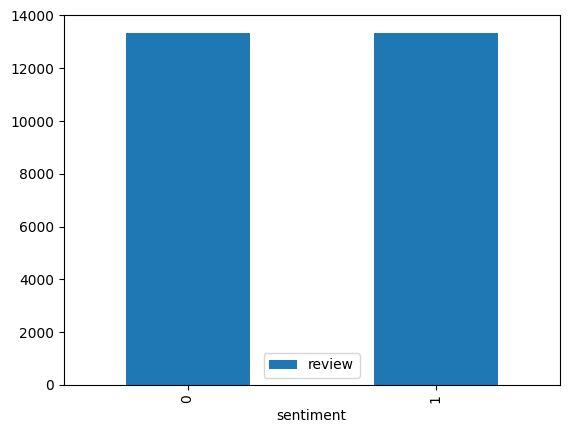

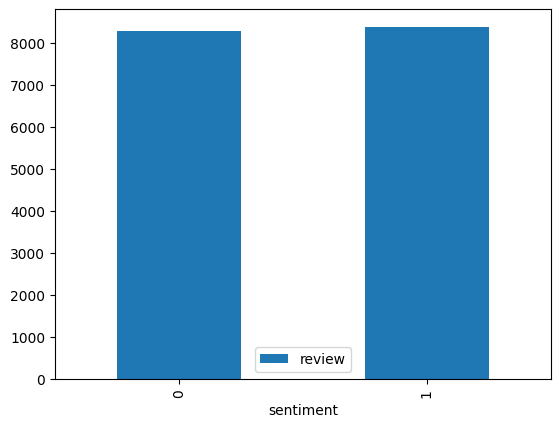

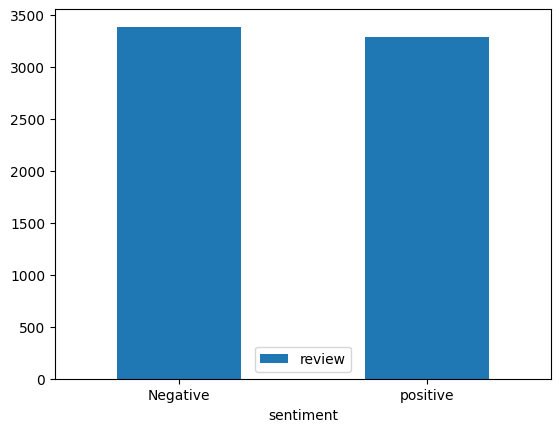

In [25]:
# Plotting the distribution for dataset.
ax = train.groupby('sentiment').count().plot(kind = 'bar')
ax = test.groupby('sentiment').count().plot(kind = 'bar')
ax = valid.groupby('sentiment').count().plot(kind = 'bar')
ax.set_xticklabels([ 'Negative' , 'positive'], rotation=0)
# Storing data in list
text, sentiment = list(train['review']), list(train['sentiment'])

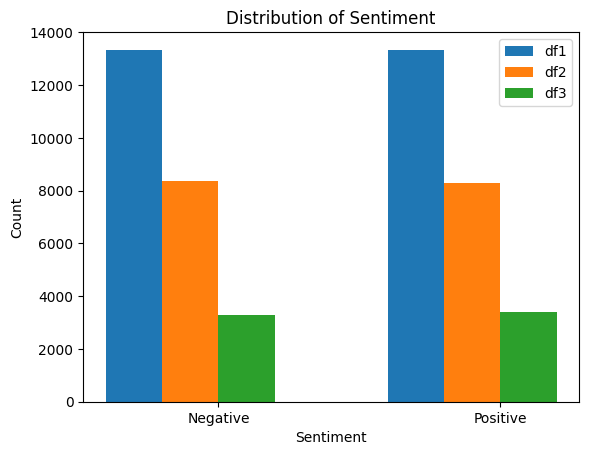

In [30]:

sentiment_counts = pd.concat([
    train['sentiment'].value_counts(),
    test['sentiment'].value_counts(),
    valid['sentiment'].value_counts()
], axis=1, keys=['df1', 'df2', 'df3']).fillna(0)

sentiment_labels = ['Negative', 'Positive']
num_dataframes = len(sentiment_counts.columns)
bar_width = 0.2
x = np.arange(len(sentiment_labels))

fig, ax = plt.subplots()
for i, col in enumerate(sentiment_counts.columns):
    ax.bar(x + (i - num_dataframes/2) * bar_width, sentiment_counts[col], bar_width, label=col)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)
ax.legend()

plt.show()


In [31]:
print('''Conclusions:
      Datasets are evenly Distributed among all 3 sets''')

Conclusions:
      Datasets are evenly Distributed among all 3 sets


In [ ]:
'''
Training time for a distilbert-base-uncased model on a single CPU is about 4hrs per epochs.
Thus I am opting for a smaller and more controllable models like CNN model.
'''


In [72]:
# Calculating number of unique words in the dataset.
df = pd.read_csv('cleaned_dataset.csv')
vocab = {}
for _,item in df.iterrows():
    for word in item['review'].split():
        if word not in vocab:
            vocab[word] = 0
        else:
            vocab[word] += 1

# sort the doctionery by value
vocab = sorted(vocab.items(), key=lambda x: x[1], reverse=True)


In [78]:
words = 0
top_5k = 0
top_10k = 0
top_20k = 0
for word, count in vocab:
    words += count
for word, count in vocab[:5000]:
    top_5k += count
for word, count in vocab[:10000]:
    top_10k += count
for word, count in vocab[:20000]:
    top_20k += count
print(f'''Total number of words in dataset is {words} from which 
      {top_5k/words*100}% are from top 5k words
      {top_10k/words*100}% are from top 10k words
      {top_20k/words*100}% are from top 20k words''')


Total number of words in dataset is 5955548 from which 
      86.24662247705837% are from top 5k words
      93.13146330111016% are from top 10k words
      97.60552681298178% are from top 20k words


In [80]:
print(f'''Conclusions:
      more than 85 percent of information is kept by selecting 5000 words. This is 0.084 percent of total words.
      reducing model size by factor of 1200
      Thus we can use 5k as max_vocab_size''')

Conclusions:
      more than 85 percent of information is kept by selecting 5000 words. This is 0.084 percent of total words.
      reducing model size by factor of 11.904761904761903
      Thus we can use 5k as max_vocab_size


In [2]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
with open('stop_words.txt', 'r') as f:
    stop_words = f.read().split('\n')

In [9]:
print(stop_words)

['a', 'am', 'an', 'and', 'any', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'both', 'but', 'by', 'during', 'each', 'for', 'from', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'just', 'll', 'm', 'ma', 'me', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'she', "she's", 'so', 't', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'until', 've', 'we', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', 'went', 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
